Epoch [5/20], Loss: 1.3218, Training Accuracy: 70.16%, Test Accuracy: 70.44%
Epoch [10/20], Loss: 1.0443, Training Accuracy: 80.43%, Test Accuracy: 82.90%
Epoch [15/20], Loss: 0.8436, Training Accuracy: 83.72%, Test Accuracy: 85.07%
Epoch [20/20], Loss: 0.6974, Training Accuracy: 85.80%, Test Accuracy: 86.33%


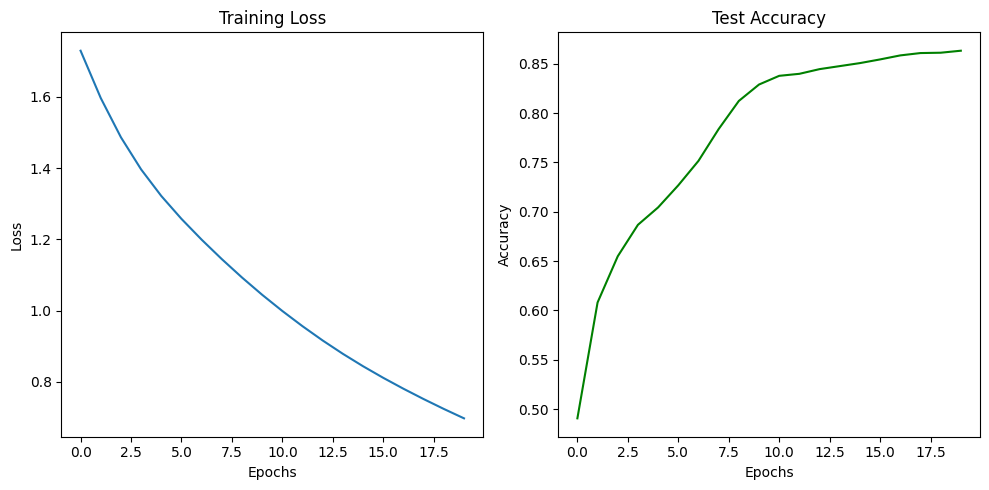

In [ ]:
import os
import zipfile
import requests
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define the URL and the local filename
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip'
local_filename = 'UCI_HAR_Dataset.zip'

# Download the file
if not os.path.exists(local_filename):
    response = requests.get(url)
    with open(local_filename, 'wb') as f:
        f.write(response.content)

# Extract the zip file
if not os.path.exists('UCI HAR Dataset'):
    with zipfile.ZipFile(local_filename, 'r') as zip_ref:
        zip_ref.extractall()

# Load the train data
train_data = pd.read_csv('UCI HAR Dataset/train/X_train.txt', header=None, sep='\s+')
train_labels = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header=None, sep='\s+')

# Load the test data
test_data = pd.read_csv('UCI HAR Dataset/test/X_test.txt', header=None, sep='\s+')
test_labels = pd.read_csv('UCI HAR Dataset/test/y_test.txt', header=None, sep='\s+')

# Standardize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data)
X_test = scaler.transform(test_data)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# Convert labels to 0-based indexing by subtracting 1
y_train_tensor = torch.tensor(train_labels.values.flatten() - 1, dtype=torch.long)  # Flatten and shift labels
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(test_labels.values.flatten() - 1, dtype=torch.long)  # Flatten and shift labels

# Define the LSTM model
class LSTM_Model(nn.Module):
    def __init__(self, input_size, hidden_layer_size, output_size):
        super(LSTM_Model, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_layer_size, batch_first=True)
        self.fc = nn.Linear(hidden_layer_size, output_size)

    def forward(self, x):
        # LSTM expects input of shape (batch_size, seq_len, input_size)
        x = x.unsqueeze(1)  # Add an extra dimension for sequence length (1 timestep)
        lstm_out, (hn, cn) = self.lstm(x)
        out = self.fc(hn[-1])  # We use the last hidden state for classification
        return out

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
hidden_layer_size = 128
output_size = len(torch.unique(y_train_tensor))  # Number of classes
model = LSTM_Model(input_size, hidden_layer_size, output_size)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 20
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)  # Corrected the shape issue
    loss.backward()
    optimizer.step()

    # Compute training accuracy
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == y_train_tensor).sum().item()
    accuracy = correct / len(y_train_tensor)

    train_losses.append(loss.item())

    # Testing phase
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        _, test_predicted = torch.max(test_outputs.data, 1)
        test_correct = (test_predicted == y_test_tensor).sum().item()
        test_accuracy = test_correct / len(y_test_tensor)
        test_accuracies.append(test_accuracy)

    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Training Accuracy: {accuracy*100:.2f}%, Test Accuracy: {test_accuracy*100:.2f}%')

# Plot training loss and test accuracy
plt.figure(figsize=(10,5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

# Plot test accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy', color='g')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')

plt.tight_layout()
plt.show()


Epoch [1/20], Loss: 0.5269, Accuracy: 86.75%
Epoch [2/20], Loss: 0.1297, Accuracy: 96.50%
Epoch [3/20], Loss: 0.0796, Accuracy: 97.54%
Epoch [4/20], Loss: 0.0596, Accuracy: 97.95%
Epoch [5/20], Loss: 0.0482, Accuracy: 98.44%
Epoch [6/20], Loss: 0.0404, Accuracy: 98.60%
Epoch [7/20], Loss: 0.0335, Accuracy: 98.93%
Epoch [8/20], Loss: 0.0286, Accuracy: 99.09%
Epoch [9/20], Loss: 0.0268, Accuracy: 99.25%
Epoch [10/20], Loss: 0.0215, Accuracy: 99.35%
Epoch [11/20], Loss: 0.0207, Accuracy: 99.40%
Epoch [12/20], Loss: 0.0193, Accuracy: 99.31%
Epoch [13/20], Loss: 0.0149, Accuracy: 99.63%
Epoch [14/20], Loss: 0.0164, Accuracy: 99.50%
Epoch [15/20], Loss: 0.0099, Accuracy: 99.78%
Epoch [16/20], Loss: 0.0079, Accuracy: 99.84%
Epoch [17/20], Loss: 0.0061, Accuracy: 99.95%
Epoch [18/20], Loss: 0.0052, Accuracy: 99.96%
Epoch [19/20], Loss: 0.0043, Accuracy: 99.96%
Epoch [20/20], Loss: 0.0039, Accuracy: 99.99%
Test Accuracy: 94.91%


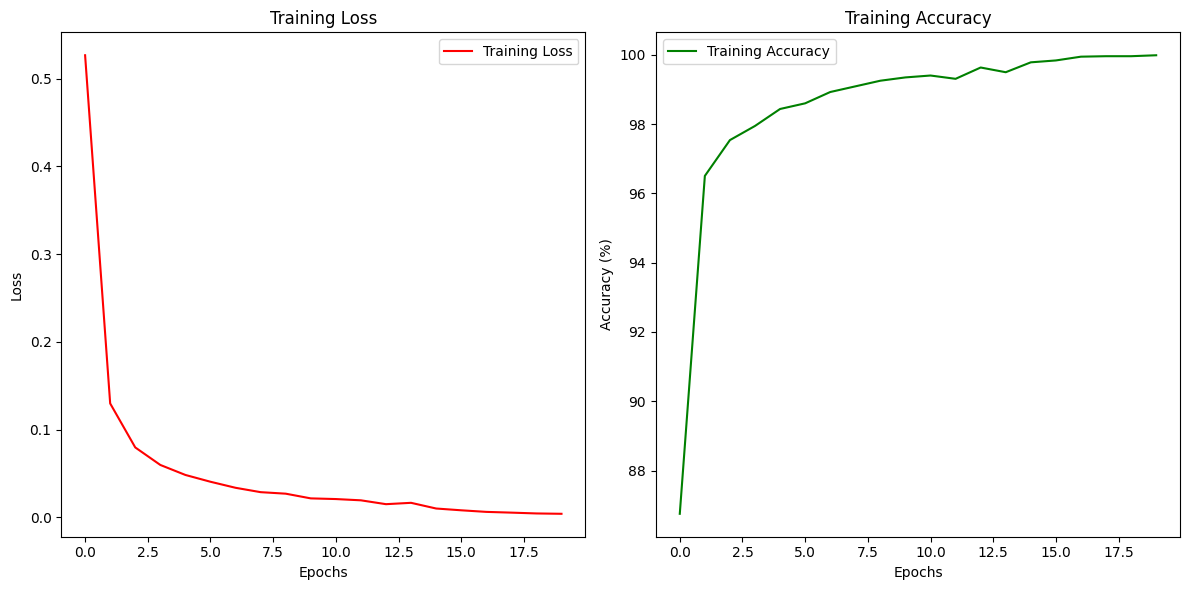

In [ ]:
import os
import zipfile
import requests
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Define the URL and the local filename
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip'
local_filename = 'UCI_HAR_Dataset.zip'

# Download the file if it doesn't exist
if not os.path.exists(local_filename):
    response = requests.get(url)
    with open(local_filename, 'wb') as f:
        f.write(response.content)

# Extract the zip file if not already extracted
if not os.path.exists('UCI HAR Dataset'):
    with zipfile.ZipFile(local_filename, 'r') as zip_ref:
        zip_ref.extractall()

# Load the train and test data
train_data = pd.read_csv('UCI HAR Dataset/train/X_train.txt', header=None, sep='\s+')
train_labels = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header=None, sep='\s+')
test_data = pd.read_csv('UCI HAR Dataset/test/X_test.txt', header=None, sep='\s+')
test_labels = pd.read_csv('UCI HAR Dataset/test/y_test.txt', header=None, sep='\s+')

# Standardize the data (normalize features)
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data)
X_test = scaler.transform(test_data)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(train_labels.values.flatten() - 1, dtype=torch.long)  # Subtract 1 to make labels 0-based
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(test_labels.values.flatten() - 1, dtype=torch.long)

# Reshape the data to be 3D (batch_size, sequence_length, input_size)
X_train_tensor = X_train_tensor.unsqueeze(1)  # Add sequence dimension (sequence length = 1)
X_test_tensor = X_test_tensor.unsqueeze(1)    # Add sequence dimension (sequence length = 1)

# Create DataLoader for training data
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the LSTM model
class HAR_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(HAR_LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # LSTM layer
        out, (hn, cn) = self.lstm(x)
        # Only use the output of the last time step (last time step is out[:, -1, :])
        out = self.fc(out[:, -1, :])
        return out

# Initialize the model
input_size = X_train.shape[1]  # Number of features in the dataset
hidden_size = 128
output_size = len(torch.unique(y_train_tensor))  # Number of classes
model = HAR_LSTM(input_size, hidden_size, output_size)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 20
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Track loss
        running_loss += loss.item()

        # Compute accuracy
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    # Calculate average loss and accuracy
    avg_loss = running_loss / len(train_loader)
    accuracy = correct / total * 100

    train_losses.append(avg_loss)
    train_accuracies.append(accuracy)

    # Print results
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')

# Test the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, test_predicted = torch.max(test_outputs, 1)
    correct = (test_predicted == y_test_tensor).sum().item()
    test_accuracy = correct / len(y_test_tensor) * 100
    print(f'Test Accuracy: {test_accuracy:.2f}%')

# Plot training loss and accuracy
plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


<ipython-input-6-4cf23680a876>:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_data = pd.read_csv('UCI HAR Dataset/train/X_train.txt', header=None, delim_whitespace=True)
<ipython-input-6-4cf23680a876>:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_labels = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header=None, delim_whitespace=True)
<ipython-input-6-4cf23680a876>:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test_data = pd.read_csv('UCI HAR Dataset/test/X_test.txt', header=None, delim_whitespace=True)
<ipython-input-6-4cf23680a876>:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` i

Epoch [5/20], Loss: 1.7241, Accuracy: 45.31%
Epoch [10/20], Loss: 1.5468, Accuracy: 39.99%
Epoch [15/20], Loss: 1.3273, Accuracy: 43.09%
Epoch [20/20], Loss: 1.1563, Accuracy: 54.47%
Final Test Accuracy: 53.55%


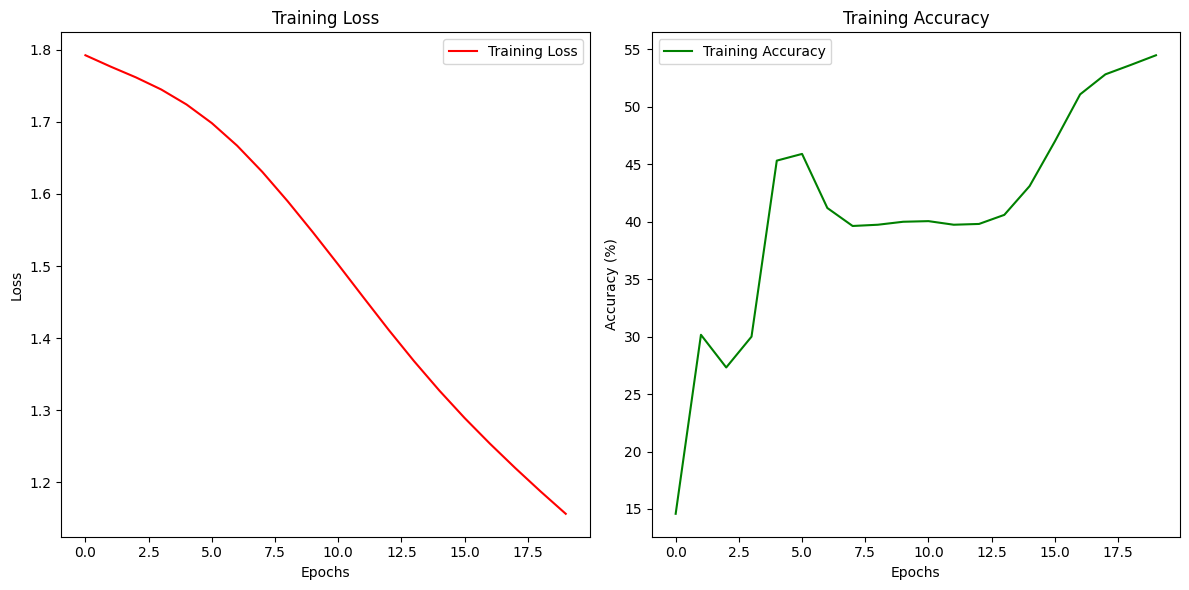

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the UCI HAR dataset (make sure to extract the dataset manually and adjust paths)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip'

# Load the train and test data
train_data = pd.read_csv('UCI HAR Dataset/train/X_train.txt', header=None, delim_whitespace=True)
train_labels = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header=None, delim_whitespace=True)
test_data = pd.read_csv('UCI HAR Dataset/test/X_test.txt', header=None, delim_whitespace=True)
test_labels = pd.read_csv('UCI HAR Dataset/test/y_test.txt', header=None, delim_whitespace=True)

# Convert to numpy arrays
X_train = train_data.values
y_train = train_labels.values.ravel() - 1  # Convert labels to 0-indexed
X_test = test_data.values
y_test = test_labels.values.ravel() - 1  # Convert labels to 0-indexed

# Reshape data to add sequence length (which is 1 in this case since there's no time dimension)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the HAR_LSTM model
class HAR_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(HAR_LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Set hyperparameters
input_size = X_train.shape[2]  # Number of features in the dataset
hidden_size = 128              # Number of LSTM units
output_size = len(np.unique(y_train))  # Number of classes
num_layers = 2                # Number of LSTM layers
learning_rate = 0.001         # Learning rate
epochs = 20                   # Number of epochs

# Initialize the model, loss function, and optimizer
model = HAR_LSTM(input_size, hidden_size, output_size, num_layers)
criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Prepare the data for PyTorch
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.long)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.long)

# Lists to store loss and accuracy values for plotting
train_losses = []
train_accuracies = []

# Training loop
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train_torch)

    # Compute loss
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()

    # Compute training accuracy
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == y_train_torch).sum().item()
    accuracy = correct / y_train_torch.size(0) * 100

    # Store loss and accuracy for plotting
    train_losses.append(loss.item())
    train_accuracies.append(accuracy)

    if (epoch+1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%')

# Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test_torch)
    _, predicted = torch.max(y_pred.data, 1)
    correct = (predicted == y_test_torch).sum().item()
    test_accuracy = correct / y_test_torch.size(0) * 100
    print(f'Final Test Accuracy: {test_accuracy:.2f}%')

# Plot training loss
plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


<ipython-input-8-6821da9f34a1>:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_data = pd.read_csv('UCI HAR Dataset/train/X_train.txt', header=None, delim_whitespace=True)
<ipython-input-8-6821da9f34a1>:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train_labels = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header=None, delim_whitespace=True)
<ipython-input-8-6821da9f34a1>:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test_data = pd.read_csv('UCI HAR Dataset/test/X_test.txt', header=None, delim_whitespace=True)
<ipython-input-8-6821da9f34a1>:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` i

Epoch 1/20, Loss: 0.7605, Accuracy: 88.90%
Epoch 2/20, Loss: 0.1831, Accuracy: 93.01%
Epoch 3/20, Loss: 0.1037, Accuracy: 94.27%
Epoch 4/20, Loss: 0.0776, Accuracy: 91.62%
Epoch 5/20, Loss: 0.0736, Accuracy: 88.63%
Epoch 6/20, Loss: 0.0662, Accuracy: 94.57%
Epoch 7/20, Loss: 0.0581, Accuracy: 90.33%
Epoch 8/20, Loss: 0.0593, Accuracy: 93.18%
Epoch 9/20, Loss: 0.0467, Accuracy: 94.84%
Epoch 10/20, Loss: 0.0595, Accuracy: 94.91%
Epoch 11/20, Loss: 0.0450, Accuracy: 90.80%
Epoch 12/20, Loss: 0.0657, Accuracy: 95.08%
Epoch 13/20, Loss: 0.0466, Accuracy: 94.20%
Epoch 14/20, Loss: 0.0385, Accuracy: 94.88%
Epoch 15/20, Loss: 0.0440, Accuracy: 92.23%
Epoch 16/20, Loss: 0.0396, Accuracy: 94.27%
Epoch 17/20, Loss: 0.0361, Accuracy: 94.71%
Epoch 18/20, Loss: 0.0300, Accuracy: 94.98%
Epoch 19/20, Loss: 0.0673, Accuracy: 94.06%
Epoch 20/20, Loss: 0.0357, Accuracy: 94.84%


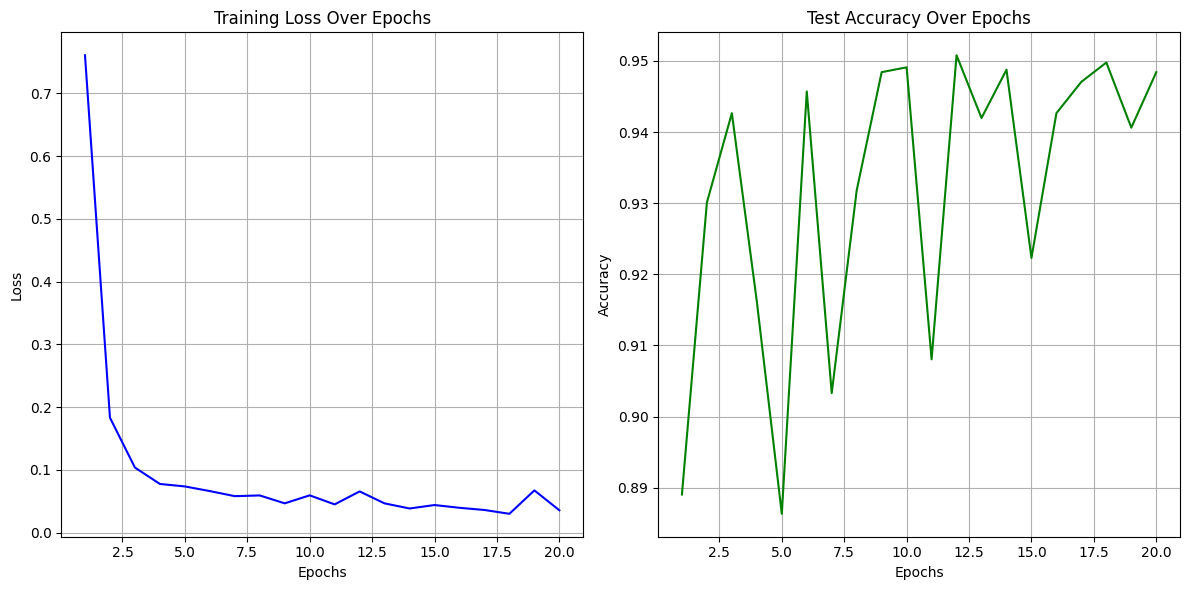

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the UCI HAR dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip'
# You can load the dataset directly from the zip file (after extracting it manually).
# For example, we load the train data:
train_data = pd.read_csv('UCI HAR Dataset/train/X_train.txt', header=None, delim_whitespace=True)
train_labels = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header=None, delim_whitespace=True)
test_data = pd.read_csv('UCI HAR Dataset/test/X_test.txt', header=None, delim_whitespace=True)
test_labels = pd.read_csv('UCI HAR Dataset/test/y_test.txt', header=None, delim_whitespace=True)

# Convert to numpy arrays
X_train = train_data.values
y_train = train_labels.values.ravel() - 1  # Convert labels to 0-indexed
X_test = test_data.values
y_test = test_labels.values.ravel() - 1  # Convert labels to 0-indexed

# Reshape data to add sequence length (which is 1 in this case since there's no time dimension)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Create DataLoaders
batch_size = 64
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the HAR_LSTM model
class HAR_LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(HAR_LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Set hyperparameters
input_size = X_train.shape[2]  # Number of features in the dataset
hidden_size = 128              # Number of LSTM units
output_size = len(np.unique(y_train))  # Number of classes
num_layers = 2                # Number of LSTM layers
learning_rate = 0.001         # Learning rate
epochs = 20                   # Number of epochs

# Initialize the model, loss function, and optimizer
model = HAR_LSTM(input_size, hidden_size, output_size, num_layers)
criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Lists to store loss and accuracy for plotting
train_losses = []
test_accuracies = []

# Training loop
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        # Move data to the same device as the model
        inputs, labels = inputs.to(model.fc.weight.device), labels.to(model.fc.weight.device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Optimize the weights
        optimizer.step()

        running_loss += loss.item()

    train_losses.append(running_loss / len(train_loader))

    # Evaluation after each epoch
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(model.fc.weight.device), labels.to(model.fc.weight.device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader):.4f}, Accuracy: {accuracy * 100:.2f}%")

# Plot training loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label="Training Loss", color='blue')
plt.title("Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)

# Plot test accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), test_accuracies, label="Test Accuracy", color='green')
plt.title("Test Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()


Epoch 1/20, Accuracy: 94.84%
Epoch 2/20, Accuracy: 94.84%
Epoch 3/20, Accuracy: 94.84%
Epoch 4/20, Accuracy: 94.84%
Epoch 5/20, Accuracy: 94.84%
Epoch 6/20, Accuracy: 94.84%
Epoch 7/20, Accuracy: 94.84%
Epoch 8/20, Accuracy: 94.84%
Epoch 9/20, Accuracy: 94.84%
Epoch 10/20, Accuracy: 94.84%
Epoch 11/20, Accuracy: 94.84%
Epoch 12/20, Accuracy: 94.84%
Epoch 13/20, Accuracy: 94.84%
Epoch 14/20, Accuracy: 94.84%
Epoch 15/20, Accuracy: 94.84%
Epoch 16/20, Accuracy: 94.84%
Epoch 17/20, Accuracy: 94.84%
Epoch 18/20, Accuracy: 94.84%
Epoch 19/20, Accuracy: 94.84%
Epoch 20/20, Accuracy: 94.84%


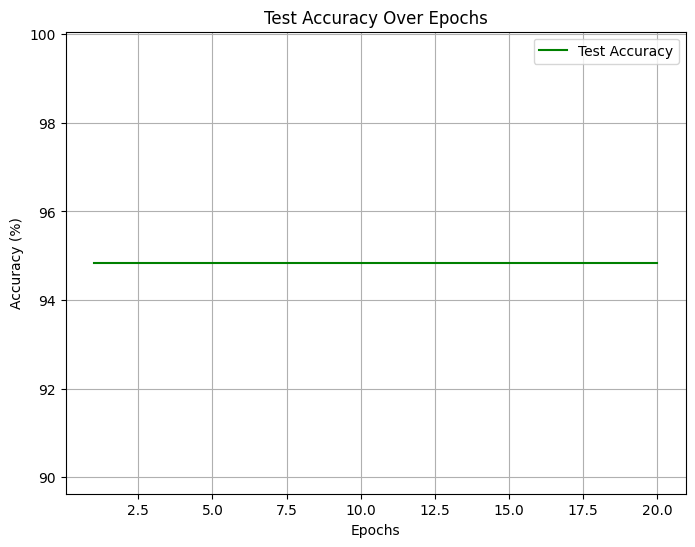

In [ ]:
import torch
import matplotlib.pyplot as plt

# Initialize a list to store accuracy for each epoch
test_accuracies = []

# Training loop (assuming model and DataLoader are already defined and training is done)
for epoch in range(epochs):
    # Set the model to evaluation mode
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(model.fc.weight.device), labels.to(model.fc.weight.device)
            outputs = model(inputs)  # Inputs are already in the correct shape
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)  # Store the accuracy for the current epoch

    print(f'Epoch {epoch + 1}/{epochs}, Accuracy: {accuracy:.2f}%')

# Plot the accuracy graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), test_accuracies, label="Test Accuracy", color='green')
plt.title("Test Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.grid(True)
plt.legend()
plt.show()


Epoch 1/20, Loss: 0.0356
Epoch 2/20, Loss: 0.0287
Epoch 3/20, Loss: 0.0365
Epoch 4/20, Loss: 0.0375
Epoch 5/20, Loss: 0.0305
Epoch 6/20, Loss: 0.0354
Epoch 7/20, Loss: 0.0373
Epoch 8/20, Loss: 0.0300
Epoch 9/20, Loss: 0.0342
Epoch 10/20, Loss: 0.0271
Epoch 11/20, Loss: 0.0200
Epoch 12/20, Loss: 0.0329
Epoch 13/20, Loss: 0.0277
Epoch 14/20, Loss: 0.0190
Epoch 15/20, Loss: 0.0159
Epoch 16/20, Loss: 0.0205
Epoch 17/20, Loss: 0.0234
Epoch 18/20, Loss: 0.0279
Epoch 19/20, Loss: 0.0204
Epoch 20/20, Loss: 0.0177


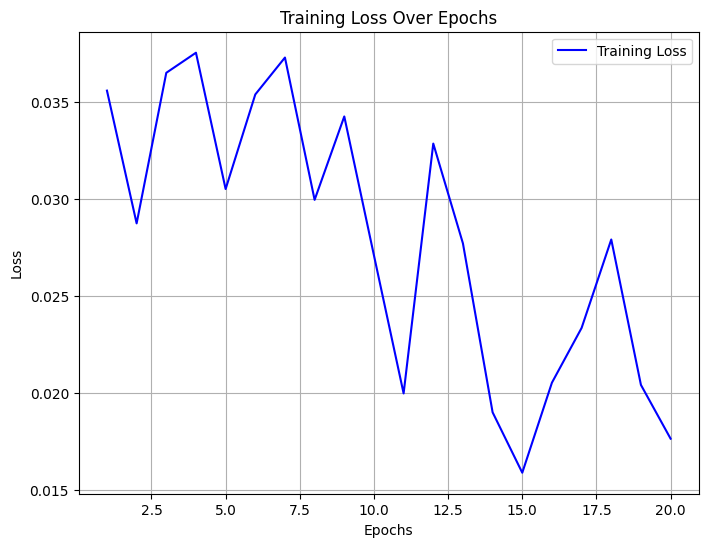

In [ ]:
import matplotlib.pyplot as plt

# Initialize the list to store the losses
losses = []

# Training loop
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(model.fc.weight.device), labels.to(model.fc.weight.device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()

        # Optimize the weights
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss for the current epoch
    average_loss = running_loss / len(train_loader)
    losses.append(average_loss)  # Store the average loss for the epoch

    # Print the loss for the current epoch
    print(f"Epoch {epoch+1}/{epochs}, Loss: {average_loss:.4f}")

# Plotting the training loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), losses, label="Training Loss", color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.legend()
plt.show()
